<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Learn_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The classification report shows precision, recall, f1-score and support for each class.
High precision and recall values indicate good performance of the model.
The confusion matrix shows the number of correct and incorrect predictions for each class.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset from TensorFlow datasets
ds, ds_info = tfds.load('iris', split='train', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/150 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/iris/incomplete.PGV3VJ_2.1.0/iris-train.tfrecord*...:   0%|          | 0/1…

Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.1.0. Subsequent calls will reuse this data.


In [3]:
# Initialize lists to hold features and labels
features = []
labels = []

# Iterate over the dataset to collect data
for example in tfds.as_numpy(ds):
    features.append(example['features'])
    labels.append(example['label'])

In [4]:
# Convert lists to numpy arrays
X = np.array(features)
y = np.array(labels)

In [5]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.89      0.94         9
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



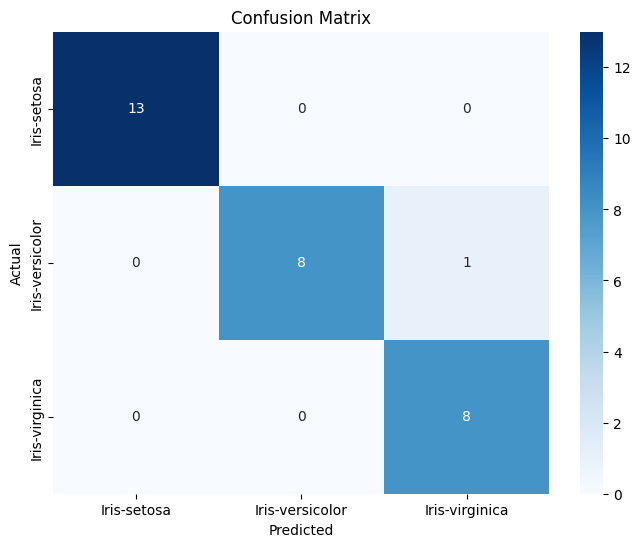

In [7]:
# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=ds_info.features['label'].names, yticklabels=ds_info.features['label'].names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()